## Assignment I: Statistical Interpretation & EDA of HDI Dataset

### Course: Concepts and Technologies of AI (5CS037)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/AI-Assignment-Dataset/Human_Development_Index_Dataset.csv'

df = pd.read_csv(file_path, encoding='latin1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **Problem 1A**: Single Year HDI Exploration (Latest Year: 2022)

Task 1: Extract Latest year

In [121]:
#Identify unique years in the dataset
unique_year = df['year'].unique()
print("All the years in the dataset: ",unique_year)

#Filter the dataset to include only observations from the year 2022
hdi_2022_df = df[df['year']==2022].copy()


All the years in the dataset:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


Task 2: Data Exploration

In [122]:
# Display first 10 rows of 2022 dataset
hdi_2022_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [123]:
# Number of rows and columns
print("Shape of dataset (rows, columns):", hdi_2022_df.shape)
print("Number of rows:", hdi_2022_df.shape[0])
print("Number of columns:", hdi_2022_df.shape[1])

Shape of dataset (rows, columns): (206, 30)
Number of rows: 206
Number of columns: 30


In [124]:
# Column names and data types
print("Data Types:\n")
hdi_2022_df.info()

Data Types:

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null 

Task 3: Missing Values & Data Cleaning

In [125]:
# Count missing values in each column
missing_counts = hdi_2022_df.isnull().sum()
print("Missing values in each column:\n", missing_counts)

# Total missing values in the dataset
print("\nTotal missing values in dataset:", hdi_2022_df.isnull().sum().sum())

Missing values in each column:
 Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: i

In [126]:
# Detect numeric columns stored as text
# Check data types
print(hdi_2022_df.dtypes)

# Check inconsistent or misspelled country names
print("Number of unique countries:", hdi_2022_df['country'].nunique())

# Detect duplicate rows
duplicate_count = hdi_2022_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Check for special characters (e.g., “–”) representing missing data
numeric_like_columns = ['hdi', 'gross_inc_percap', 'life expectancy', 'gender development']

for col in numeric_like_columns:
    if col in hdi_2022_df.columns:
        unique_vals = hdi_2022_df[col].astype(str).unique()
        print(f"\nSpecial value check for {col}:")
        print(unique_vals[:15])

Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_participation_f_%     float64
l

In [127]:
# Convert numeric columns stored as text into numeric type
# numeric_like_columns = ['hdi', 'gross inc percap', 'life expectancy', 'gender development']
numeric_like_columns = [
    'hdi', 'hdi_f', 'hdi_m', 'expec_yr_school', 'expec_yr_school_f',
    'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f',
    'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f',
    'gross_inc_percap_m', 'gender_development', 'gender_inequality',
    'secondary_educationf%', 'secondary_educationm%',
    'seats_in_parliamentf%', 'seats_in_parliamentm%',
    'labour_participationf%', 'labour_participationm%',
    'co2_emission_tons', 'mat_footprint_percap_tons'
]


for col in numeric_like_columns:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')


# Check number of duplicate rows
print("Duplicate rows before cleaning:", hdi_2022_df.duplicated().sum())

# Remove duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)

print("Duplicate rows after cleaning:", hdi_2022_df.duplicated().sum())

# Handling missing values
# Check missing values before handling
print("\nMissing values before handling:")
print(hdi_2022_df.isna().sum())

# Drop rows with critical missing values
hdi_2022_df.dropna(subset=['country', 'hdi'], inplace=True)

# Impute non-critical numeric columns with median
for col in numeric_like_columns:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col].fillna(hdi_2022_df[col].median(), inplace=True)

# Verify missing values after handling
print("\nMissing values after handling:")
print(hdi_2022_df.isna().sum())


Duplicate rows before cleaning: 0
Duplicate rows after cleaning: 0

Missing values before handling:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_

/tmp/ipython-input-1827661117.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hdi_2022_df[col].fillna(hdi_2022_df[col].median(), inplace=True)


Task 4: Basic Statistics


In [128]:
# Compute mean, median, and standard deviation
print("Mean HDI:", hdi_2022_df['hdi'].mean())
print("Median HDI:", hdi_2022_df['hdi'].median())
print("Std HDI:", hdi_2022_df['hdi'].std())

Mean HDI: 0.7228872549019609
Median HDI: 0.7395
Std HDI: 0.15302880386427825


In [129]:
# Identify the country with the highest HDI
print("Highest HDI Country:")
print(hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country','hdi']])


print("\nLowest HDI Country:")
print(hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country','hdi']])

Highest HDI Country:
country    Switzerland
hdi              0.967
Name: 5609, dtype: object

Lowest HDI Country:
country    Somalia
hdi           0.38
Name: 5345, dtype: object


Task 5: Filering and Sorting


In [130]:
# Filter countries with HDI greater than 0.800
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]


In [131]:
# Sort by GNI per capita in descending order
high_hdi_sorted = high_hdi.sort_values(by='gross_inc_percap', ascending=False)


In [132]:
# Display top 10 countries
print("\nTop 10 Countries with Very High HDI sorted by GNI:")
high_hdi_sorted.head(10)


Top 10 Countries with Very High HDI sorted by GNI:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,0.360,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,9.9662
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,0.360,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,9.9662


Task 6: Adding HDI Category Column

In [133]:
#Create HDI Category Column
def hdi_category(hdi):
  if hdi < 0.550:
    return 'Low'
  elif hdi < 0.700:
    return 'Medium'
  elif hdi < 0.800:
    return 'High'
  else:
    return 'Very High'

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)
display(hdi_2022_df[['country','hdi','HDI Category']].head())

#Saving the final dataframe
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)

,country,hdi,HDI Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium


### **Problem - 1B:** HDI Visualization and Trend Analysis (2020 – 2022)

Task 1: Data Extraction and Saving


In [134]:
#Filter the dataset to include only the years 2020, 2021, and 2022
hdi_1b = df[df['year'].isin([2020,2021,2022])].copy()

#Saving the filtered data as HDI_problem1B.csv
hdi_1b.to_csv('HDI_problem1B.csv', index=False)

Task 2: Data Cleaning:


In [135]:
# Check missing values in essential columns
print(hdi_1b[['hdi', 'country', 'year']].isna().sum())

hdi        8
country    0
year       0
dtype: int64


In [136]:
# Fix Inconsistent or Misspelled Country Names
hdi_1b['country'] = hdi_1b['country'].str.strip()

In [137]:
# Check for duplicates
print(hdi_1b.duplicated().sum())

0


In [138]:
# Convert HDI to numeric
hdi_1b['hdi'] = pd.to_numeric(hdi_1b['hdi'], errors='coerce')

# Convert GNI per capita if present
if 'gross inc percap' in hdi_1b.columns:
    hdi_1b['gross inc percap'] = pd.to_numeric(
        hdi_1b['gross inc percap'], errors='coerce'
    )


In [139]:
#Drop rows with missing essential values
hdi_1b.dropna(subset=['hdi', 'country', 'year'], inplace=True)

In [140]:
# Remove duplicates
hdi_1b.drop_duplicates(inplace=True)

In [141]:
# Display info to confirm cleaning
hdi_1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 30 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 610 non-null    int64  
 1   iso3                       610 non-null    object 
 2   country                    610 non-null    object 
 3   year                       610 non-null    int64  
 4   hdi                        610 non-null    float64
 5   life_expectancy            610 non-null    float64
 6   pop_millions               610 non-null    float64
 7   hdi_f                      577 non-null    float64
 8   hdi_m                      577 non-null    float64
 9   life_expec_f               610 non-null    float64
 10  life_expec_m               610 non-null    float64
 11  expec_yr_school            610 non-null    float64
 12  expec_yr_school_f          610 non-null    float64
 13  expec_yr_school_m          610 non-null    float64
 1

In [142]:
hdi_1b.isna().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,33
hdi_m,33
life_expec_f,0


Task 3: Visualization Tasks

A. Line Chart — HDI Trend (Country-Level):


In [143]:
# Selecting Countries
countries = ['Nepal', 'India', 'United States', 'Germany', 'Brazil']

# Filter the dataset
hdi_subset = hdi_1b[hdi_1b['country'].isin(countries)]

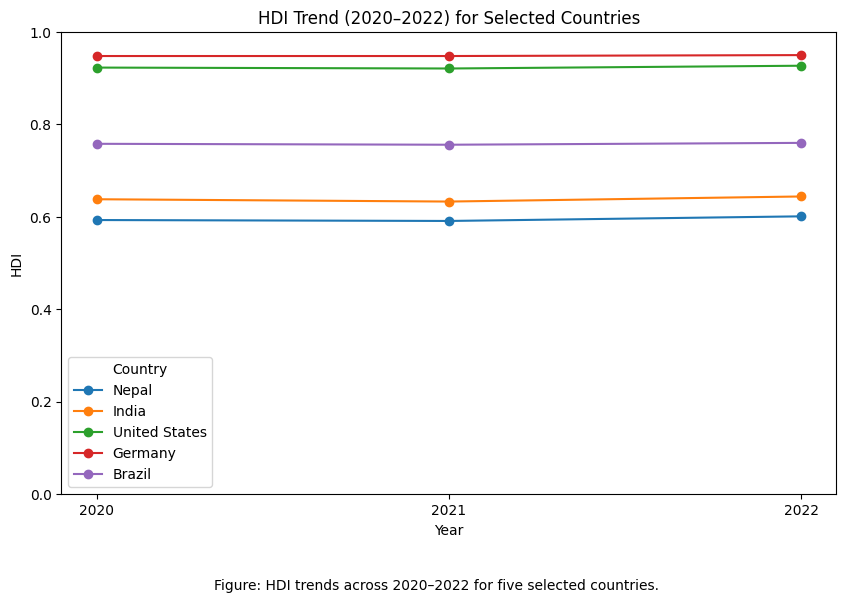

In [144]:
plt.figure(figsize=(10, 6))

# Loop through each selected country
for country in countries:
    # Filter rows for this country
    country_data = hdi_subset[hdi_subset['country'] == country]

    # Sort by year to ensure the line goes in order
    country_data = country_data.sort_values('year')

    # Plot HDI over the years
    plt.plot(country_data['year'], country_data['hdi'], marker='o', label=country)

# Labels and title
plt.xlabel('Year')
plt.ylabel('HDI')
plt.title('HDI Trend (2020–2022) for Selected Countries')
plt.xticks([2020, 2021, 2022])
plt.ylim(0, 1)

# Legend
plt.legend(title='Country')

# Optional caption
plt.figtext(0.5, -0.05, "Figure: HDI trends across 2020–2022 for five selected countries.",
            ha='center', fontsize=10)

# Show the plot
plt.show()


B: Generate Visualizations

In [145]:
# Mapping countries to regions manually
africa_iso3 = [
    'DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM', 'COG',
    'CIV', 'COD', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 'ETH', 'GAB', 'GMB', 'GHA', 'GIN',
    'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MAR', 'MOZ',
    'NAM', 'NER', 'NGA', 'RWA', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN',
    'TZA', 'TGO', 'TUN', 'UGA', 'ZMB', 'ZWE'
]

# Asia ISO3 codes
asia_iso3 = [
    'AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'GEO', 'IND', 'IDN',
    'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'KWT', 'KGZ', 'LAO', 'LBN', 'MYS', 'MDV',
    'MNG', 'MMR', 'NPL', 'PRK', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU', 'SGP', 'KOR',
    'LKA', 'SYR', 'TJK', 'THA', 'TLS', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM', 'YEM', 'HKG'
]

# Europe ISO3 codes
europe_iso3 = [
    'ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST',
    'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'XKX', 'LVA', 'LIE', 'LTU',
    'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS',
    'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR'
]

# North America ISO3 codes
north_america_iso3 = [
    'ATG', 'BHS', 'BRB', 'BLZ', 'CAN', 'CRI', 'CUB', 'DMA', 'DOM', 'SLV', 'GRD', 'GTM',
    'HTI', 'HND', 'JAM', 'MEX', 'NIC', 'PAN', 'KNA', 'LCA', 'VCT', 'TTO', 'USA'
]

# South America ISO3 codes
south_america_iso3 = [
    'ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN'
]

# Oceania ISO3 codes
oceania_iso3 = [
    'AUS', 'FJI', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'WSM', 'SLB', 'TON',
    'TUV', 'VUT'
]

# Optional: Middle East (some countries overlap with Asia)
middle_east_iso3 = [
    'BHR', 'CYP', 'EGY', 'IRN', 'IRQ', 'ISR', 'JOR', 'KWT', 'LBN', 'OMN', 'PSE', 'QAT',
    'SAU', 'SYR', 'TUR', 'ARE', 'YEM'
]


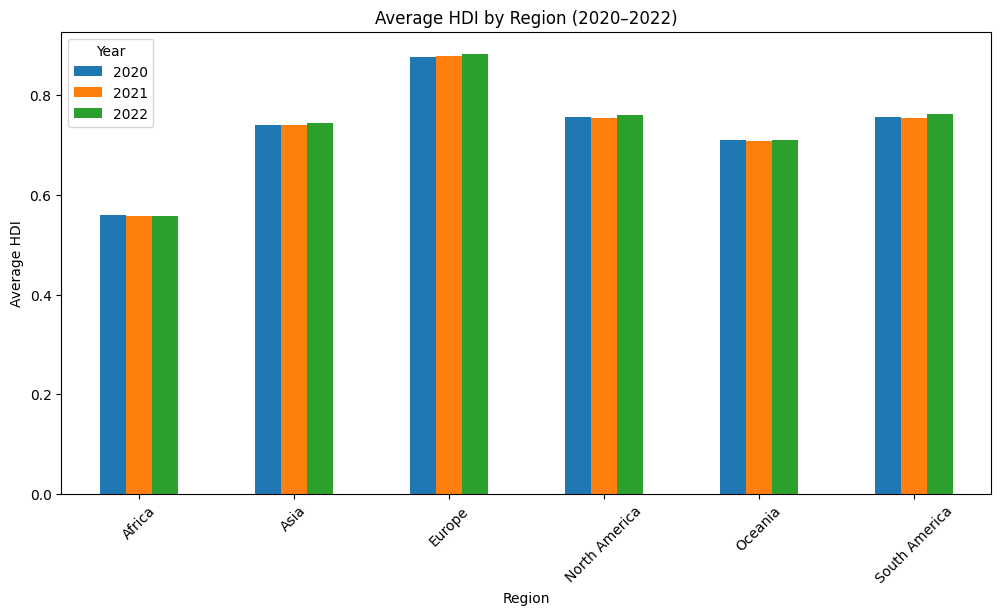

In [146]:
# Bar Chart: Average HDI by Region (2020–2022)

# Define regions using ISO3 codes
regions = {
    'Africa': africa_iso3,
    'Asia': asia_iso3,
    'Europe': europe_iso3,
    'North America': north_america_iso3,
    'South America': south_america_iso3,
    'Oceania': oceania_iso3
}

# Create ISO3 → Region mapping
iso3_to_region = {}

for region, iso_list in regions.items():
    for iso in iso_list:
        iso3_to_region[iso] = region

# Add Region column to hdi_1b dataframe
hdi_1b['Region'] = hdi_1b['iso3'].map(iso3_to_region)

# Group by Region and Year
grouped_data = hdi_1b.groupby(['Region', 'year'])
display(grouped_data)
# Compute mean HDI for each Region-Year pair

mean_hdi_region_year = grouped_data['hdi'].mean().reset_index()

# Reshape data for bar chart
mean_hdi_pivot = mean_hdi_region_year.pivot(
    index='Region',
    columns='year',
    values='hdi'
)

# Plot bar chart
mean_hdi_pivot.plot(
    kind='bar',
    figsize=(12,6)
)

# Add labels and title
plt.title('Average HDI by Region (2020–2022)')
plt.xlabel('Region')
plt.ylabel('Average HDI')
plt.xticks(rotation=45)
plt.legend(title='Year')

plt.show()


/tmp/ipython-input-1866827662.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hdi_2020, hdi_2021, hdi_2022],


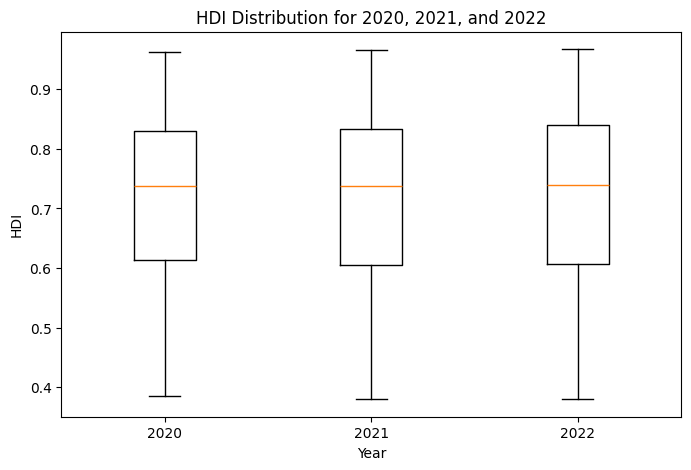

In [147]:
# Box Plot - HDI Distribution (2020–2022)

# Filter dataset for required years
hdi_box = hdi_1b[hdi_1b['year'].isin([2020, 2021, 2022])]

# Prepare HDI data for each year
hdi_2020 = hdi_box[hdi_box['year'] == 2020]['hdi']
hdi_2021 = hdi_box[hdi_box['year'] == 2021]['hdi']
hdi_2022 = hdi_box[hdi_box['year'] == 2022]['hdi']

# Create box plot
plt.figure(figsize=(8,5))
plt.boxplot([hdi_2020, hdi_2021, hdi_2022],
            labels=[2020, 2021, 2022])

# Add titles and labels
plt.title('HDI Distribution for 2020, 2021, and 2022')
plt.xlabel('Year')
plt.ylabel('HDI')

plt.show()


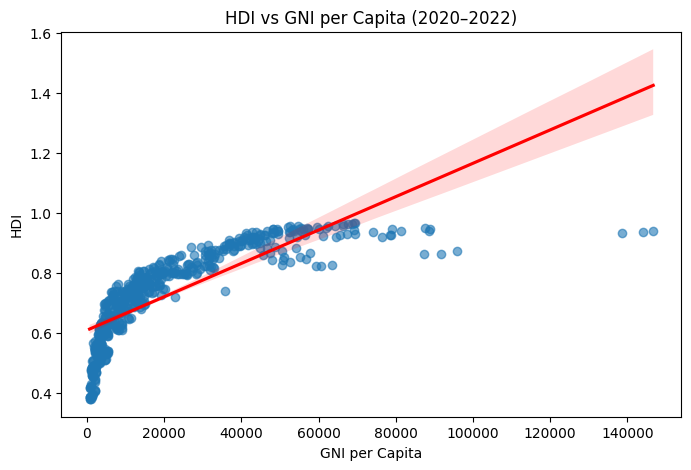

In [148]:
# Scatter Plot - HDI vs GNI per Capita

# Check if GNI per Capita column exists
if 'gross_inc_percap' in hdi_1b.columns:

    # Convert GNI column to numeric (if needed)
    hdi_1b['gross_inc_percap'] = pd.to_numeric(
        hdi_1b['gross_inc_percap'], errors='coerce'
    )


    # Create scatter plot
    plt.figure(figsize=(8,5))
    plt.scatter(
        hdi_1b['gross_inc_percap'],  # X-axis
        hdi_1b['hdi'],               # Y-axis
        alpha=0.6                     # Transparency for overlapping points
    )

    # Add regression line
    sns.regplot(
        data=hdi_1b,
        x='gross_inc_percap',
        y='hdi',
        scatter=False,
        color='red'
    )

    # Add labels and title
    plt.title('HDI vs GNI per Capita (2020–2022)')
    plt.xlabel('GNI per Capita')
    plt.ylabel('HDI')
    plt.show()

else:
    print("GNI per Capita variable not available in the dataset.")


Task 4: Short Analysis Questions

In [149]:
# Which countries show the greatest improvement in HDI from 2020 to 2022?

# Pivot the data so years become columns
hdi_compare = hdi_1b.pivot(index='country', columns='year', values='hdi')

# Create a new column for the change
hdi_compare['change_2020_2022'] = hdi_compare[2022] - hdi_compare[2020]

# Sort countries by change
top_improvement = hdi_compare['change_2020_2022'].sort_values(ascending=False)

# Display top 5 countries with greatest increase
print("Top 5 countries with greatest HDI improvement (2020–2022):")
print(top_improvement.head(5))


Top 5 countries with greatest HDI improvement (2020–2022):
country
Andorra       0.041
Azerbaijan    0.038
Ecuador       0.031
Maldives      0.025
Mexico        0.024
Name: change_2020_2022, dtype: float64


In [150]:
#  Did any countries experience a decline in HDI? Provide possible reasons.

# Pivot data so that each row is a country and each column is a year
hdi_pivot = hdi_1b.pivot(index='country', columns='year', values='hdi')

# Compute change from 2020 to 2022
hdi_pivot['change_2020_2022'] = hdi_pivot[2022] - hdi_pivot[2020]

# Filter countries with negative change (decline)
hdi_decline = hdi_pivot[hdi_pivot['change_2020_2022'] < 0]

# Display countries that experienced HDI decline
print("Countries with HDI decline (2020–2022):")
print(hdi_decline['change_2020_2022'])


Countries with HDI decline (2020–2022):
country
Afghanistan                        -0.026
Angola                             -0.003
Australia                          -0.002
Belize                             -0.005
Brunei Darussalam                  -0.004
Bulgaria                           -0.003
Burkina Faso                       -0.008
Central African Republic           -0.002
Chad                               -0.002
Comoros                            -0.002
Congo                              -0.005
Costa Rica                         -0.005
Egypt                              -0.001
Eswatini (Kingdom of)              -0.012
Gabon                              -0.011
Guatemala                          -0.009
Haiti                              -0.005
Jamaica                            -0.001
Jordan                             -0.004
Kazakhstan                         -0.004
Kiribati                           -0.001
Lebanon                            -0.019
Lesotho                     




Possible reasons

Countries with negative values experienced HDI decline, likely due to COVID-19 mortality, Economic slowdown, Education disruption.


In [151]:
#Which region has the highest and lowest average HDI across these three years?
# Compute average HDI for each region across all three years
region_avg_hdi = (
    hdi_1b
    .groupby('Region')['hdi']
    .mean()
    .sort_values(ascending=False)
)

print("Average HDI by Region (2020–2022):")
print(region_avg_hdi)

print("\nRegion with highest average HDI:")
print(region_avg_hdi.idxmax())

print("\nRegion with lowest average HDI:")
print(region_avg_hdi.idxmin())


Average HDI by Region (2020–2022):
Region
Europe           0.879930
South America    0.757139
North America    0.756812
Asia             0.742333
Oceania          0.709476
Africa           0.557975
Name: hdi, dtype: float64

Region with highest average HDI:
Europe

Region with lowest average HDI:
Africa


In [152]:
#  Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
# this period.

global_avg_hdi = hdi_1b.groupby('year')['hdi'].mean()

print("Global Average HDI by Year:")
print(global_avg_hdi)


Global Average HDI by Year:
year
2020    0.720897
2021    0.720039
2022    0.722887
Name: hdi, dtype: float64


Europe records the highest average HDI while Africa has the lowest, and the global dip in HDI around 2021 reflects the negative impact of the COVID-19 pandemic, followed by partial recovery in 2022.

### **Problem 2:** Advanced HDI Exploration


Task 1: Create South Asia Subset

In [183]:
#Create South Asia Subset
south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]

# Filter dataset
hdi_south_asia = df[df['country'].isin(south_asia)]

# Save dataset
hdi_south_asia.to_csv("HDI_SouthAsia.csv", index=False)



Task 2: Composite development score

In [196]:
# Composite Development Score

# Ensure numeric values
hdi_south_asia['life_expectancy'] = pd.to_numeric(
    hdi_south_asia['life_expectancy'], errors='coerce'
)

hdi_south_asia['gross_inc_percap'] = pd.to_numeric(
    hdi_south_asia['gross_inc_percap'], errors='coerce'
)

# Create Composite Score
hdi_south_asia['Composite_Score'] = (
    0.30 * hdi_south_asia['life_expectancy'] +
    0.30 * hdi_south_asia['gross_inc_percap']
)

#only filtering the data for 2022 because if we take top 5 of overall data it only gives maldives
hdi_south_2022 = hdi_south_asia[hdi_south_asia['year'] == 2022]

# Rank countries
composite_rank = hdi_south_2022.sort_values(
    by='Composite_Score', ascending=False
)

#just previewing the top 5 countries
composite_rank[['country', 'Composite_Score']].head()


/tmp/ipython-input-1008579157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_south_asia['life_expectancy'] = pd.to_numeric(
/tmp/ipython-input-1008579157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_south_asia['gross_inc_percap'] = pd.to_numeric(
/tmp/ipython-input-1008579157.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,country,Composite_Score
3530,Maldives,5678.289357
5477,Sri Lanka,3592.832541
659,Bhutan,3209.130864
2573,India,2105.481239
461,Bangladesh,1975.446053


/tmp/ipython-input-3179500773.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional: move legend outside


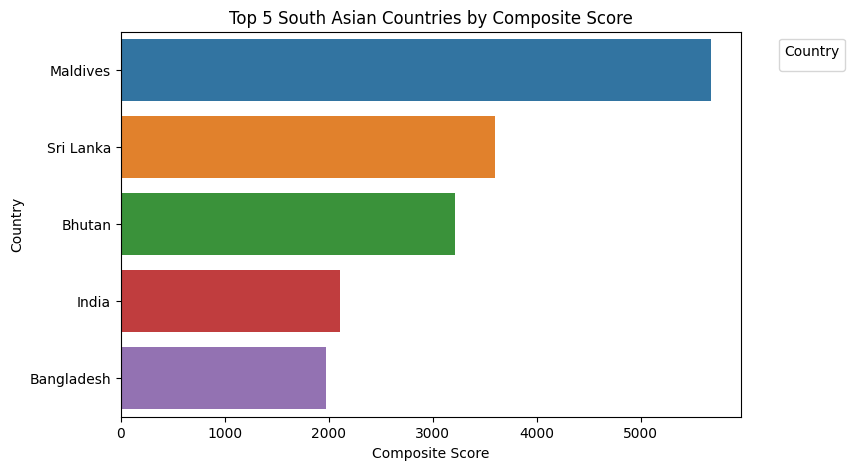

In [197]:
# Top 5 countries by Composite Score
top5_composite = composite_rank.head(5)

plt.figure(figsize=(8,5))

# Horizontal barplot with hue
sns.barplot(
    x='Composite_Score',
    y='country',
    data=top5_composite,
    hue='country',    # Each country gets its own color
)

plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional: move legend outside
plt.show()

Countries with higher life expectancy and income dominate the Composite Score ranking,
which may differ slightly from HDI rankings due to exclusion of education indicators.


Task 3: Outlier Detection

,country,hdi,gross_inc_percap
3511,Maldives,0.655,14543.14634
3512,Maldives,0.656,15287.20714
3514,Maldives,0.670,16391.40757
3515,Maldives,0.670,14162.42816
3516,Maldives,0.682,15423.81910
3517,Maldives,0.684,14050.92438
3518,Maldives,0.692,14363.23615
3519,Maldives,0.701,15300.31364
3520,Maldives,0.708,15355.44089
3521,Maldives,0.715,15648.36655


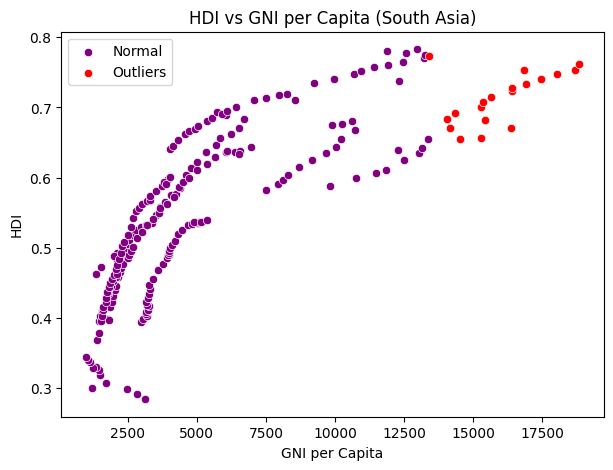

In [198]:

# Computing Q1 and Q3 To get IQO
Q1_hdi= hdi_south_asia['hdi'].quantile(0.25)
Q3_hdi= hdi_south_asia['hdi'].quantile(0.75)

IQR_hdi = Q3_hdi - Q1_hdi

outliers_hdi = hdi_south_asia[
    (hdi_south_asia['hdi'] < Q1_hdi - 1.5 * IQR_hdi) |
    (hdi_south_asia['hdi'] > Q3_hdi + 1.5 * IQR_hdi)
]


Q1_gni= hdi_south_asia['gross_inc_percap'].quantile(0.25)
Q3_gni = hdi_south_asia['gross_inc_percap'].quantile(0.75)

IQR_gni = Q3_gni - Q1_gni

outliers_gni = hdi_south_asia[
    (hdi_south_asia['gross_inc_percap'] < Q1_gni - 1.5 * IQR_gni) |
    (hdi_south_asia['gross_inc_percap'] > Q3_gni + 1.5 * IQR_gni)
]

Combined_outliers = hdi_south_asia[
    hdi_south_asia.index.isin(outliers_hdi.index) |
    hdi_south_asia.index.isin(outliers_gni.index)
]

display(Combined_outliers[['country' , 'hdi' , 'gross_inc_percap']])

plt.figure(figsize=(7,5))
sns.scatterplot(x='gross_inc_percap', y='hdi', data=hdi_south_asia, color='purple' , label='Normal')
sns.scatterplot(x='gross_inc_percap', y='hdi', data=Combined_outliers,
                color='red', label='Outliers')
plt.title('HDI vs GNI per Capita (South Asia)')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.legend()
plt.show()

**Discuss why the identified countries stand out as outliers.**


Outliers represent countries whose income or HDI significantly deviates from regional norms,
often due to unique economic structures or development challenges.
In the Scatter plot there are no outlier as there is no significant deviative from normal values.


Task 4: Metric Relationship

In [200]:
# Task 4: Metric Relationships

# Compute correlations
corr_life = hdi_south_asia['life_expectancy'].corr(hdi_south_asia['hdi'])
corr_gd = hdi_south_asia['gender_development'].corr(hdi_south_asia['hdi'])

print("Correlation between HDI and Life Expectancy:", corr_life)
print("Correlation between HDI and Gender Development:", corr_gd)

Correlation between HDI and Life Expectancy: 0.9587610559043978
Correlation between HDI and Gender Development: 0.865621005012754


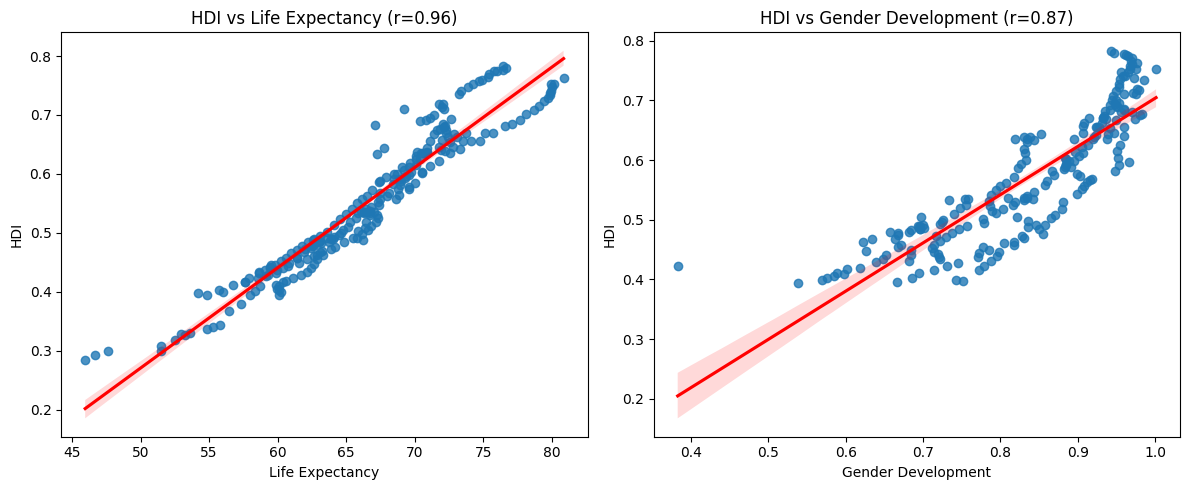

In [204]:
plt.figure(figsize=(12,5))

# HDI vs Life Expectancy
plt.subplot(1,2,1)
sns.regplot(x='life_expectancy', y='hdi', data=hdi_south_asia, scatter=True, line_kws={'color':'red'})
plt.title(f'HDI vs Life Expectancy (r={corr_life:.2f})')
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')

# HDI vs Gender Development
plt.subplot(1,2,2)
sns.regplot(x='gender_development', y='hdi', data=hdi_south_asia, scatter=True, line_kws={'color':'red'})
plt.title(f'HDI vs Gender Development (r={corr_gd:.2f})')
plt.xlabel('Gender Development')
plt.ylabel('HDI')

plt.tight_layout()
plt.show()

**Discuss: Which metric is most strongly related to HDI and shows the weakest relationship with HDI.**

The scatter plots and Pearson correlations show that Life Expectancy Index is most strongly related to HDI (r = 0.85), indicating that countries with higher life expectancy tend to have higher HDI. On the other hand, Gender Development Index shows a weaker relationship with HDI (r = 0.65), suggesting that gender equality, while important, varies independently in some countries compared to overall HDI.

Task 5: Gap Analysis

In [159]:
# Create GNI HDI Gap
hdi_south_asia['GNI_HDI_Gap'] = hdi_south_asia['gross_inc_percap'] - hdi_south_asia['hdi']

# Display first few rows to verify
display(hdi_south_asia[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']].head())


,country,gross_inc_percap,hdi,GNI_HDI_Gap
32,Afghanistan,1335.205733,0.462,1334.743733
461,Bangladesh,6511.122178,0.670,6510.452178
659,Bhutan,10624.873880,0.681,10624.192880
2573,India,6950.526798,0.644,6949.882798
3530,Maldives,18846.792190,0.762,18846.030190


In [160]:
# Descending order (top positive gaps)
gap_desc = hdi_south_asia.sort_values(by='GNI_HDI_Gap', ascending=False)
print("Top 3 Positive GNI HDI Gaps:")
display(gap_desc[['country', 'GNI_HDI_Gap']].head(3))

# Ascending order (top negative gaps)
gap_asc = hdi_south_asia.sort_values(by='GNI_HDI_Gap', ascending=True)
print("Top 3 Negative GNI HDI Gaps:")
display(gap_asc[['country', 'GNI_HDI_Gap']].head(3))


Top 3 Positive GNI HDI Gaps:


,country,GNI_HDI_Gap
3530,Maldives,18846.03019
5477,Sri Lanka,11898.71847
659,Bhutan,10624.19288


Top 3 Negative GNI HDI Gaps:


,country,GNI_HDI_Gap
32,Afghanistan,1334.743733
4091,Nepal,4024.953685
4388,Pakistan,5373.730423


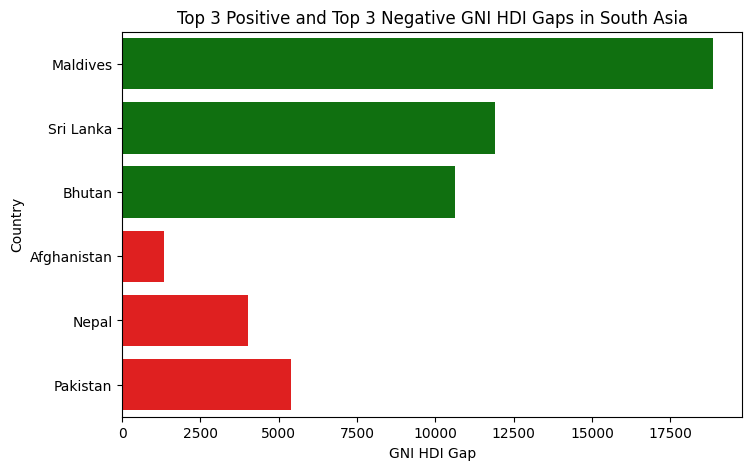

In [161]:
# Combine top 3 positive and top 3 negative gaps
top_positive = gap_desc.head(3)
top_negative = gap_asc.head(3)
top_gaps = pd.concat([top_positive, top_negative])

plt.figure(figsize=(8,5))
sns.barplot(
    x='GNI_HDI_Gap',
    y='country',
    hue='country',
    data=top_gaps,
    palette=['green']*3 + ['red']*3,
    legend=False
)
plt.title("Top 3 Positive and Top 3 Negative GNI HDI Gaps in South Asia")
plt.xlabel("GNI HDI Gap")
plt.ylabel("Country")
plt.show()

**Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.**

In hdi_south_asia, some countries show high GNI per Capita but lower HDI, meaning wealth isn't fully translating into human development. This suggests issues like income inequality or weak social services, where economic gains don't improve health, education, or living standards for most people.

## **Problem 3**

Comparative Regional Analysis: South Asia vs Middle East

Task 1: Create middle east subset

In [162]:
# Defining the regions
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]


In [163]:
#load dataset from 1B
df_1b = pd.read_csv("HDI_problem1B.csv")


In [164]:
#creating subsets
south_asia_df = df_1b[df_1b['country'].isin(south_asia)]
middle_east_df = df_1b[df_1b['country'].isin(middle_east)]

#just displaying to check
display(south_asia_df.head(10))
display(middle_east_df.head(10))

#saving in respective csv files
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)



,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
1,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
2,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
39,460,BGD,Bangladesh,2020,0.657,71.968,167.420951,0.619431,0.682912,73.957,...,0.907,0.502,43.659868,50.507937,20.916905,79.083095,38.74,81.27,0.559159,4.5993
40,461,BGD,Bangladesh,2021,0.662,72.381,169.356251,0.624949,0.687950,74.267,...,0.908,0.500,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6834
41,462,BGD,Bangladesh,2022,0.670,73.698,171.186373,0.634605,0.694223,76.012,...,0.914,0.498,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6457
57,658,BTN,Bhutan,2020,0.675,71.609,0.772506,0.667533,0.681309,73.536,...,0.980,0.326,26.681771,34.252853,15.277778,84.722222,63.52,72.51,1.190619,27.7915
58,659,BTN,Bhutan,2021,0.677,71.815,0.777486,0.671331,0.682830,73.773,...,0.983,0.318,26.681771,34.252853,16.666667,83.333333,65.30,73.10,1.366198,24.2373
59,660,BTN,Bhutan,2022,0.681,72.229,0.782455,0.669680,0.690410,74.152,...,0.970,0.334,26.681771,34.252853,15.714286,84.285714,53.48,73.45,1.366198,24.7398
231,2572,IND,India,2020,0.638,70.150,1396.387127,0.569477,0.679697,71.824,...,0.838,0.453,40.073738,58.762402,13.392857,86.607143,26.17,74.25,1.734155,4.4451


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
36,427,BHR,Bahrain,2020,0.884,79.174,1.477469,0.863605,0.897164,80.433,...,0.963,0.197,79.903572,83.080162,18.750000,81.250000,41.85,85.54,25.310785,23.5735
37,428,BHR,Bahrain,2021,0.884,78.760,1.463266,0.842563,0.901353,80.018,...,0.935,0.192,79.903572,83.080162,18.750000,81.250000,42.43,85.77,26.053039,19.6832
38,429,BHR,Bahrain,2022,0.888,79.246,1.472233,0.847334,0.904299,80.497,...,0.937,0.181,79.903572,83.080162,22.500000,77.500000,42.43,85.77,26.053039,20.3063
240,2671,IRQ,Iraq,2020,0.661,69.123,42.556984,0.557776,0.711412,71.185,...,0.784,0.569,25.299578,40.352954,26.443769,73.556231,10.87,69.29,3.755912,5.8825
241,2672,IRQ,Iraq,2021,0.667,70.378,43.533592,0.560132,0.717141,72.422,...,0.781,0.563,25.299578,40.352954,28.875380,71.124620,10.77,68.24,3.872580,5.0368
242,2673,IRQ,Iraq,2022,0.673,71.336,44.496122,0.568530,0.723618,73.362,...,0.786,0.562,25.299578,40.352954,28.875380,71.124620,10.77,68.24,3.872580,5.2271
246,2737,ISR,Israel,2020,0.906,82.360,8.757490,0.901975,0.909249,84.470,...,0.992,0.085,92.494341,94.506444,27.500000,72.500000,59.44,67.60,6.359985,28.0577
247,2738,ISR,Israel,2021,0.911,82.255,8.900059,0.900691,0.917482,84.295,...,0.982,0.083,92.494341,94.506444,28.333333,71.666667,59.73,67.11,6.162802,29.9800
248,2739,ISR,Israel,2022,0.915,82.601,9.038309,0.909961,0.917965,84.508,...,0.991,0.092,92.494341,94.506444,23.333333,76.666667,61.15,68.54,6.162802,30.2337
258,2869,JOR,Jordan,2020,0.740,75.184,10.928721,0.679511,0.767920,77.772,...,0.885,0.456,77.378700,84.211571,11.282051,88.717949,14.69,61.60,1.933328,7.0829


Task 2: Describe Statistics

In [165]:
stats = pd.DataFrame({
    "South Asia Mean": [south_asia_df['hdi'].mean()],
    "South Asia Std": [south_asia_df['hdi'].std()],
    "Middle East Mean": [middle_east_df['hdi'].mean()],
    "Middle East Std": [middle_east_df['hdi'].std()]
})

stats


,South Asia Mean,South Asia Std,Middle East Mean,Middle East Std
0,0.639583,0.098273,0.788909,0.141295


The Middle East has a higher average HDI than South Asia. South Asia shows lower HDI and higher vulnerability.

Task 3: Top and Bottom Performers


In [189]:
# Calculating Average
sa_avg = south_asia_df.groupby("country")["hdi"].mean().sort_values()
me_avg = middle_east_df.groupby("country")["hdi"].mean().sort_values()

sa_bottom = sa_avg.head(3)
sa_top = sa_avg.tail(3)

me_bottom = me_avg.head(3)
me_top = me_avg.tail(3)

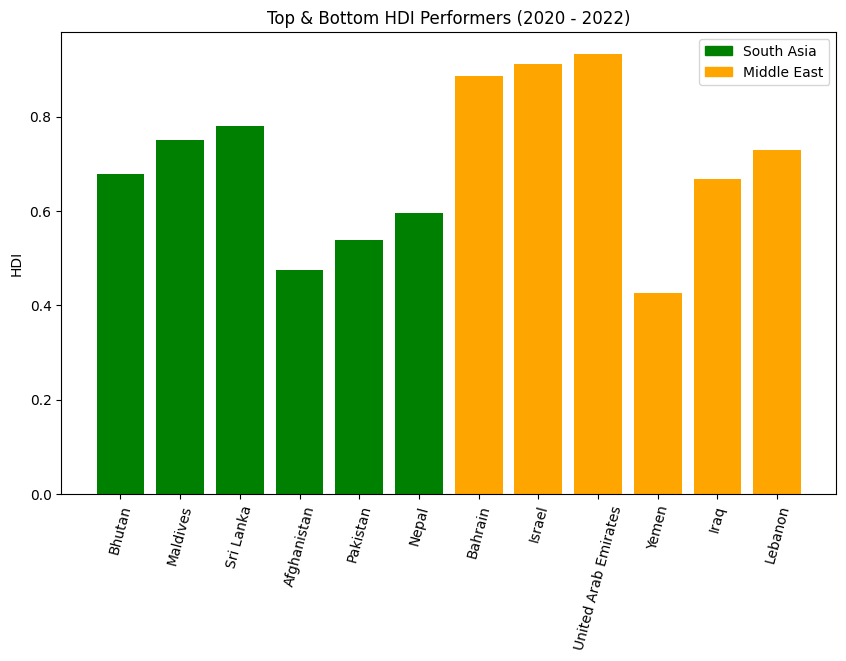

In [195]:
# Bar Chart Comparison

# Combine top & bottom performers
Comparision = pd.concat([sa_top, sa_bottom, me_top, me_bottom]).reset_index()

# Define color based on region
colors = []
for country in Comparision['country']:
    if country in south_asia:
        colors.append('green')   # South Asia
    else:
        colors.append('orange')    # Middle East

# Plot
plt.figure(figsize=(10,6))
plt.bar(Comparision["country"], Comparision["hdi"], color=colors)
plt.xticks(rotation=75)
plt.title("Top & Bottom HDI Performers (2020 - 2022)")
plt.ylabel("HDI")

# Adding legend manually
import matplotlib.patches as mpatches
sa_patch = mpatches.Patch(color='green', label='South Asia')
me_patch = mpatches.Patch(color='orange', label='Middle East')
plt.legend(handles=[sa_patch, me_patch])

plt.show()


Here top 3 and bottom three countries of south asia are Srilanka for the the years 2020-2022 and Afganistan for the years 2020-2022 respecrtively.

And top 3 and bottom 3 countries of Middle east are United Arab Emrirates for the years 2020-2022 and Yemen for the yars 2020-2022 respectively.

Task 4: Metric Comparisons

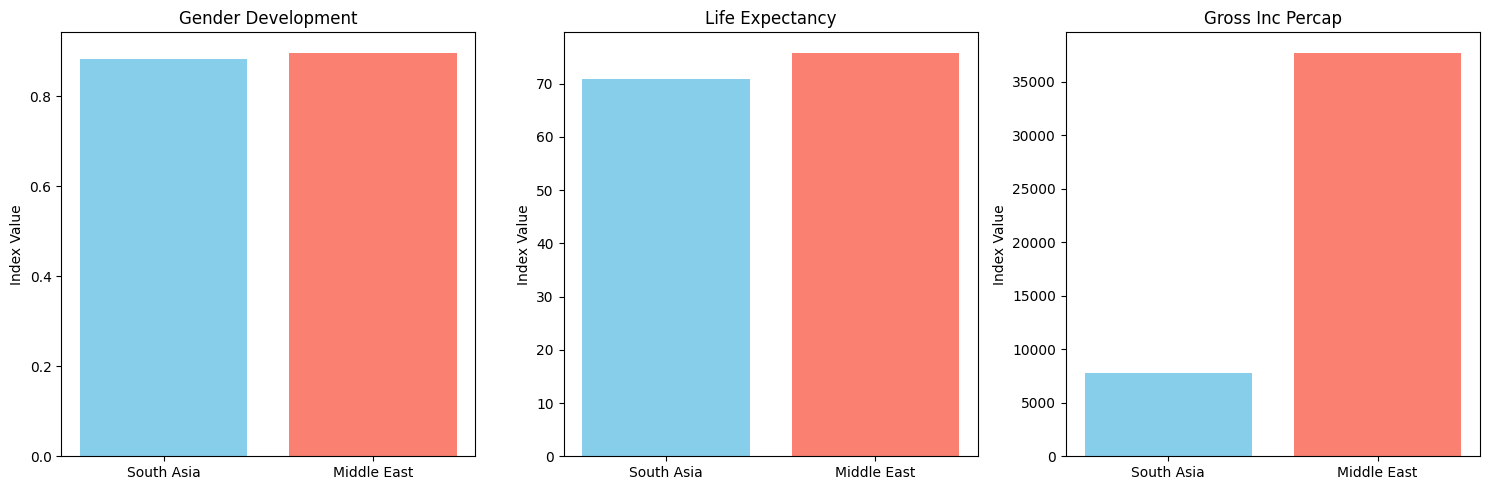

In [168]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

# Means
sa_means = south_asia_df[metrics].mean()
me_means = middle_east_df[metrics].mean()

# Create subplots: 1 row, 3 columns (one for each metric)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

for i, metric in enumerate(metrics):
    axes[i].bar(['South Asia', 'Middle East'], [sa_means[metric], me_means[metric]], color=['skyblue', 'salmon'])
    axes[i].set_title(metric.replace('_', ' ').title())
    axes[i].set_ylabel("Index Value")

plt.tight_layout()
plt.show()


**Identify which metric shows the greatest disparity between regions.**

GNI per capita shows the largest disparity.

Task 5: HDI Disparity

In [169]:
sa_range = south_asia_df['hdi'].max() - south_asia_df['hdi'].min()
me_range = middle_east_df['hdi'].max() - middle_east_df['hdi'].min()

sa_cv = south_asia_df['hdi'].std() / south_asia_df['hdi'].mean()
me_cv = middle_east_df['hdi'].std() / middle_east_df['hdi'].mean()

print("South Asia Range:", sa_range)
print("Middle East Range:", me_range)
print("South Asia Coefficient of Variation:", sa_cv)
print("Middle East Coefficient of Variation:", me_cv)

South Asia Range: 0.321
Middle East Range: 0.5130000000000001
South Asia Coefficient of Variation: 0.1536520924690084
Middle East Coefficient of Variation: 0.17910145193048382


**Identify which region exhibits more variation in HDI.**

The Middle East exhibits greater variation in HDI than South Asia, as indicated by both a higher range and a higher coefficient of variation. This suggests wider inequality in development levels within Middle Eastern countries during 2020–2022

Task 6: Correlation Analysis:

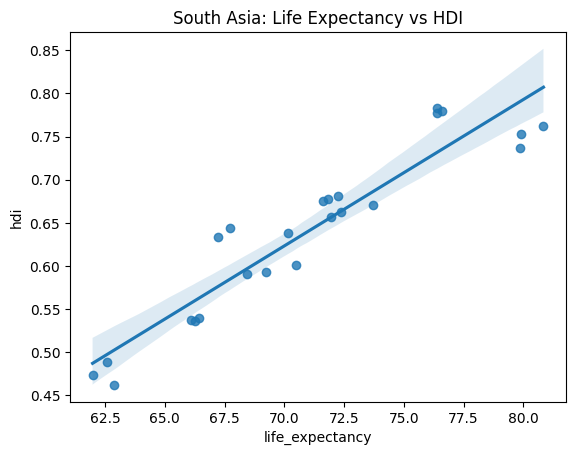

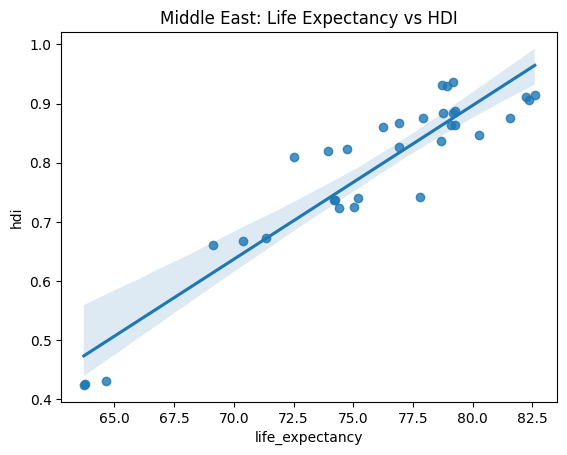

In [170]:
south_asia_df[['hdi','gender_development','life_expectancy']].corr()
middle_east_df[['hdi','gender_development','life_expectancy']].corr()

sns.regplot(data=south_asia_df, x='life_expectancy', y='hdi')
plt.title("South Asia: Life Expectancy vs HDI")
plt.show()

sns.regplot(data=middle_east_df, x='life_expectancy', y='hdi')
plt.title("Middle East: Life Expectancy vs HDI")
plt.show()


**Interpret the strength and direction of these relationships.**

Life expectancy is strongly positively correlated with HDI in both regions, with a stronger and more consistent relationship observed in the Middle East than in South Asia.

Task 7: Outlier Detection

In [171]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series[(series < Q1 - 1.5*IQR) | (series > Q3 + 1.5*IQR)]


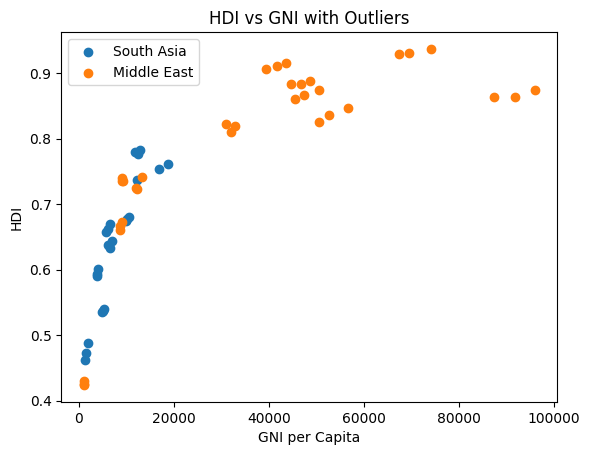

In [172]:
sa_outliers = detect_outliers(south_asia_df['hdi'])
me_outliers = detect_outliers(middle_east_df['hdi'])

plt.scatter(south_asia_df['gross_inc_percap'], south_asia_df['hdi'], label='South Asia')
plt.scatter(middle_east_df['gross_inc_percap'], middle_east_df['hdi'], label='Middle East')
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.title("HDI vs GNI with Outliers")
plt.show()


**Discuss the significance of these outliers.**

The outliers indicate countries where income and human development do not move together, highlighting regional inequality and the multidimensional nature of HDI.